In [1]:
import xarray as xr

In [2]:
ds = xr.open_zarr("D:\\EOData\\DCS4COP\\OLCI-SNS-RAW-CUBE.zarr")

In [3]:
ds

<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 1000, lon: 2000, time: 222)
Coordinates:
  * lat            (lat) float64 52.5 52.5 52.49 52.49 52.49 52.49 52.48 ...
    lat_bnds       (lat, bnds) float64 dask.array<shape=(1000, 2), chunksize=(1000, 2)>
  * lon            (lon) float64 0.00125 0.00375 0.00625 0.00875 0.01125 ...
    lon_bnds       (lon, bnds) float64 dask.array<shape=(2000, 2), chunksize=(2000, 2)>
  * time           (time) datetime64[ns] 2016-11-24T09:43:16.372487168 ...
    time_bnds      (time, bnds) datetime64[ns] dask.array<shape=(222, 2), chunksize=(1, 2)>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<shape=(222, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_chl       (time, lat, lon) float64 dask.array<shape=(222, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_tsm       (time, lat, lon) float64 dask.array<shape=(222, 1000, 2000), chunksize=(1, 1000, 2000)>
    kd489          (time, lat, lon) f

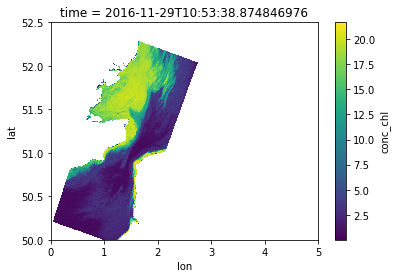

In [5]:
ds.conc_chl.isel(time=3).plot.imshow()

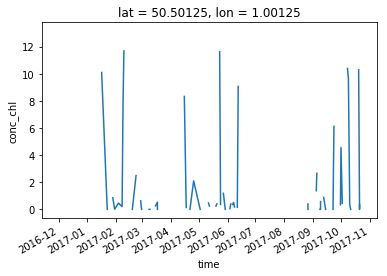

In [6]:
ds.conc_chl.sel(lon=1., lat=50.5, method='nearest').plot()

In [7]:
ds_w = ds.groupby('time.week').mean(dim='time')

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


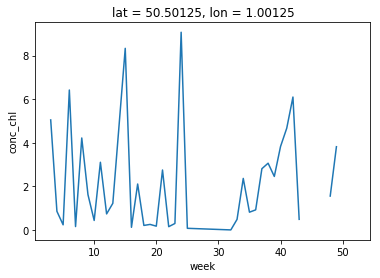

In [8]:
ds_w.conc_chl.sel(lon=1., lat=50.5, method='nearest').plot()

In [9]:
ds_m = ds.groupby('time.month').mean(dim='time')

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


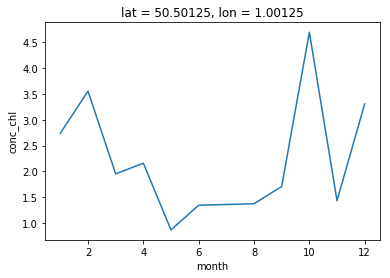

In [10]:
ds_m.conc_chl.sel(lon=1., lat=50.5, method='nearest').plot()

In [16]:
ds_rw = ds.resample(time='1W').mean()

In [18]:
ds_rw

<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 1000, lon: 2000, time: 49)
Coordinates:
  * time           (time) datetime64[ns] 2016-11-27 2016-12-04 2016-12-11 ...
  * lat            (lat) float64 52.5 52.5 52.49 52.49 52.49 52.49 52.48 ...
    lat_bnds       (lat, bnds) float64 52.5 52.5 52.5 52.5 52.49 52.49 52.49 ...
  * lon            (lon) float64 0.00125 0.00375 0.00625 0.00875 0.01125 ...
    lon_bnds       (lon, bnds) float64 0.0 0.0025 0.0025 0.005 0.005 0.0075 ...
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<shape=(49, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_chl       (time, lat, lon) float64 dask.array<shape=(49, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_tsm       (time, lat, lon) float64 dask.array<shape=(49, 1000, 2000), chunksize=(1, 1000, 2000)>
    kd489          (time, lat, lon) float64 dask.array<shape=(49, 1000, 2000), chunksize=(1, 1000, 2000)>
    quality_flags  (time, lat, lon) flo

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


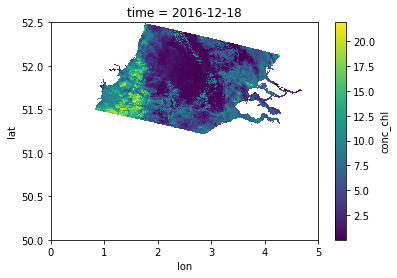

In [17]:
ds_rw.conc_chl.isel(time=3).plot.imshow()

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


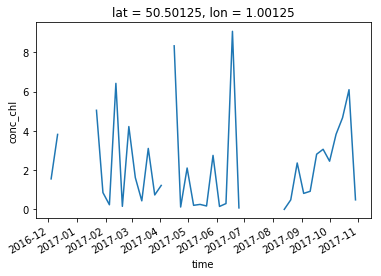

In [19]:
ds_rw.conc_chl.sel(lon=1., lat=50.5, method='nearest').plot()

In [20]:
ds_rm = ds.resample(time='1M').mean()

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


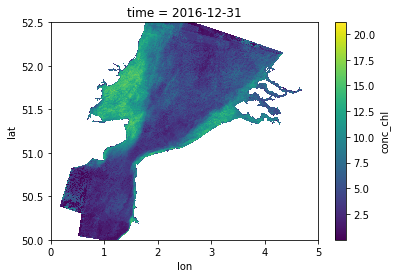

In [25]:
ds_rm.conc_chl.isel(time=1).plot.imshow()

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


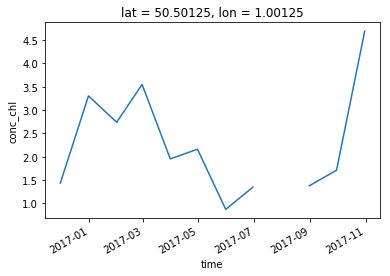

In [26]:
ds_rm.conc_chl.sel(lon=1., lat=50.5, method='nearest').plot()

In [27]:
from xarray.core.coordinates import remap_label_indexers

In [34]:
remap_label_indexers(ds_rm, lon=1., lat=50.5, time='2016-12-24', method='nearest', tolerance=0.1)

KeyError: '2016-12-24'